<a href="https://colab.research.google.com/github/vigneshtamilan/vignesh/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import pickle

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
pip install --user scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import sklearn

In [8]:
from sklearn.naive_bayes import GaussianNB

In [10]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [11]:
from sklearn import tree

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.model_selection import GridSearchCV,cross_validate
from sklearn.model_selection import train_test_split

In [14]:
from sklearn import metrics

In [15]:
import matplotlib.pyplot as plt

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
import imblearn

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [25]:
data = pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [28]:
data['Gender'].fillna(data['Gender'].mode()[0])

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [29]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

In [30]:
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

In [31]:
data['Dependents']=data['Dependents'].str.replace('+','')

<ipython-input-31-d550c6f6dffc>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [32]:
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])

In [33]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [34]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

In [35]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [36]:
data['Credit-Histroy'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [37]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 9.2 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=4e4afe395254021727720edd07e7feb038ef09b036e81d368cf3cb658ca05e5a
  Stored in directory: /root/.cache/pip/wheels/c9/a5/cc/cb20f1314d4cdec0001fd72baa1efe93e1542a81bdea2fc639
Successfully built libarchive


In [38]:
#changing the datatype of each float column to int

In [39]:
data['Gender']=data['Gender'].astype

In [40]:
data['Married']=data['Married'].astype

In [41]:
data['Dependents']=data['Dependents'].astype

In [42]:
data['Self_Employed']=data['Self_Employed'].astype

In [43]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype

In [44]:
data['LoanAmount']=data['LoanAmount'].astype

In [45]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype

In [46]:
data['Credit_History']=data['Credit_History'].astype

In [47]:
from imblearn.combine import SMOTETomek

In [48]:
smote = SMOTETomek

In [49]:
x=data.drop(columns=['Loan_Status'],axis=1)
y=data['Loan_Status']

In [50]:
#creating the dataset into dependent and independent y and x respectively
x = data.drop(columns=['Loan_Status'],axis=1)
y = data['Loan_Status']

In [ ]:
#ctreating  a new x and y variable for the balanced set
x_bal,y_bal = smote.fit_resample(x,y)

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
print(y.value_counts())
print(y_bal.value_count())


Y    422
N    192
Name: Loan_Status, dtype: int64


NameError: ignored

In [55]:
from imblearn import under_sampling as us


In [56]:
data.describe()

,ApplicantIncome,Credit-Histroy
count,614.000000,614.000000
mean,5403.459283,0.855049
std,6109.041673,0.352339
min,150.000000,0.000000
25%,2877.500000,1.000000
50%,3812.500000,1.000000
75%,5795.000000,1.000000
max,81000.000000,1.000000


In [57]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Axes: >

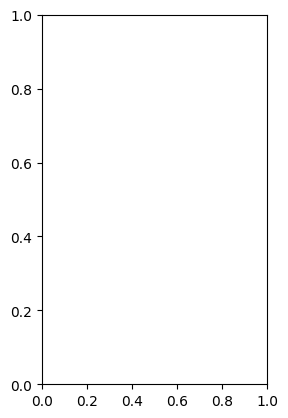

In [58]:
plt.subplot(121)


<ipython-input-59-34510a15bf4c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'],color='r')


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

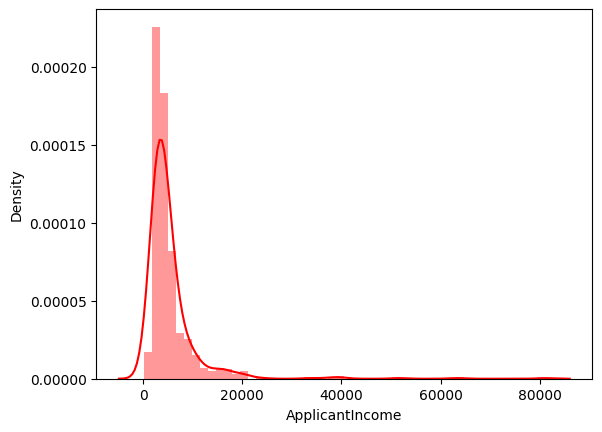

In [59]:
sns.distplot(data['ApplicantIncome'],color='r')

<Axes: >

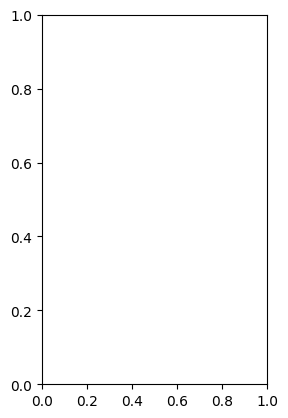

In [60]:
plt.subplot(122)

<ipython-input-62-a6a01f5c828d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])


TypeError: ignored

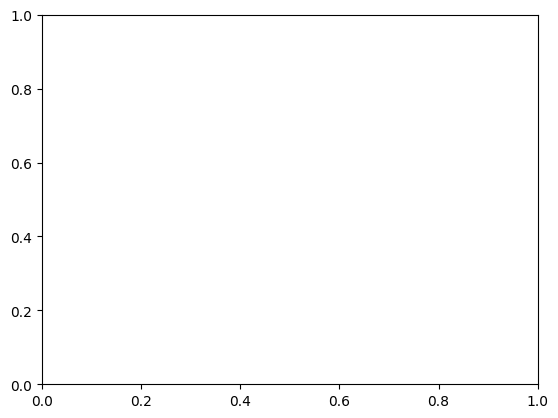

In [62]:
sns.distplot(data['Credit_History'])

In [63]:
plt.show()

In [64]:
plt.figure(figsize=(18,4))

<Figure size 1800x400 with 0 Axes>

<Figure size 1800x400 with 0 Axes>

<Axes: >

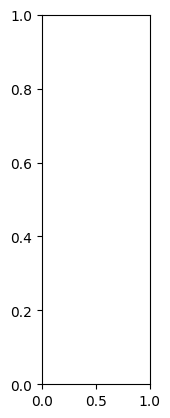

In [65]:
plt.subplot(1,4,1)

<Axes: >

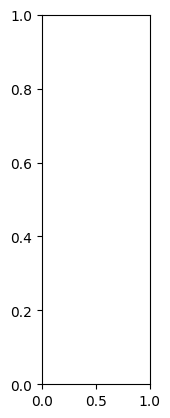

In [66]:
plt.subplot(1,4,2)

In [67]:
plt.show()

In [68]:
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<Axes: >

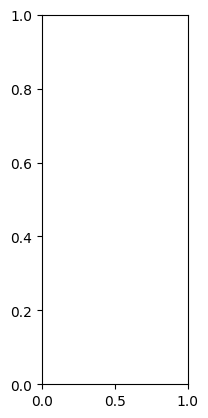

In [69]:
plt.subplot(131)

<Axes: xlabel='Gender', ylabel='count'>

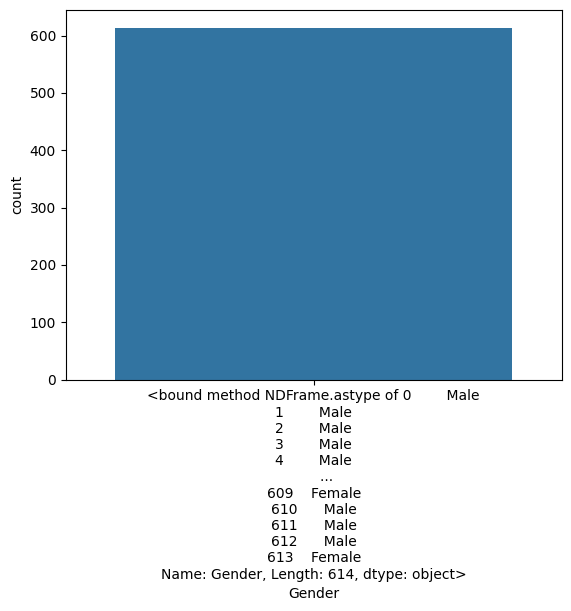

In [70]:
sns.countplot(data['Married'], x=data['Gender'])

<Axes: >

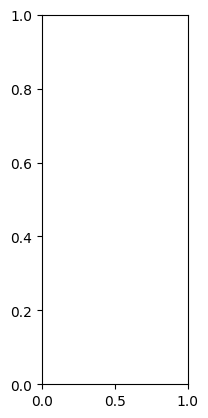

In [71]:
plt.subplot(132)

<Axes: xlabel='Education', ylabel='count'>

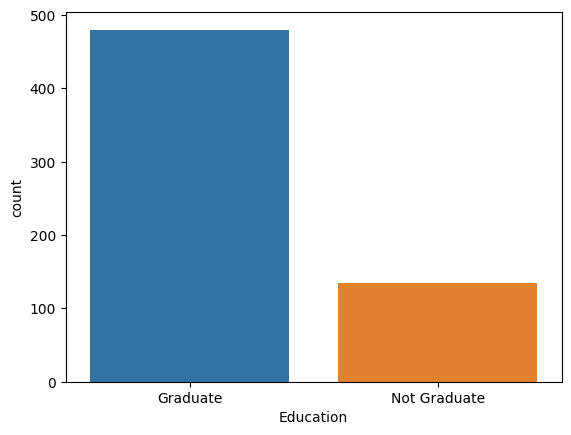

In [72]:
sns.countplot(data['Self_Employed'], x=data['Education'])

<Axes: >

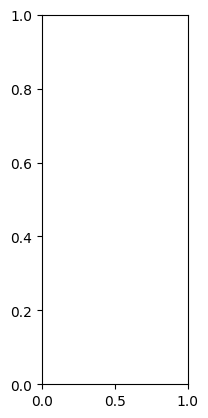

In [73]:
plt.subplot(133)

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

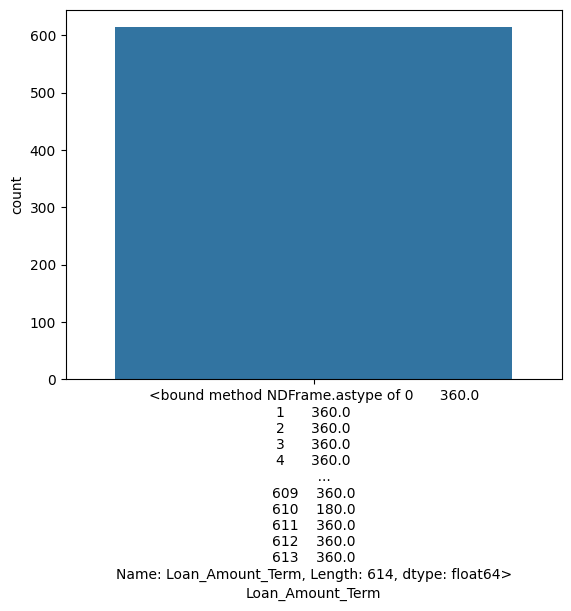

In [74]:
sns.countplot(data['Property_Area'], x=data['Loan_Amount_Term'])

In [77]:
sc=StandardScaler()

In [78]:
import tensorflow

In [76]:
!pip install matplotlib-venn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [80]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 57.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp39-cp39-linux_x86_64.whl size=11113646 sha256=f6aeed3bce7f967660d3b72886e7ed0e570d59b54b62321e206240b8c23897f9
  Stored in directory: /root/.cache/pip/wheels/74/b9/f5/2c94acd7cd21480e6cf63169144d7aac3e8d9cf638225ed578
Successfully built cartopy


In [83]:
import tensorflow

In [84]:

from tensorflow.keras.layers import Dense

In [85]:
from keras.models import Sequential

In [86]:
import numpy as np
y = np.array(y).reshape(-1,1)

In [87]:
sc=StandardScaler()

In [88]:
classifier = Sequential()

In [89]:
dt=DecisionTreeClassifier()

In [90]:
sc=StandardScaler()

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123) 

In [93]:
 def decisionTree(x_train,x_test,y_train,y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    ypred =dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('confusion matrix')
    print(confusion_matrix(y_test,ypred))
    print('Classification report')
    print(classification_report(y_test,ypred))

In [94]:
def rendomForest(x_train, x_test, y_train, y_test):
   rf = RandomForestClassifier()
   rf.fit(x_train,y_train)
   ypred = rf.predict(x_test)
   print('***RandomForestClassifier***')
   print('Confusion matrix')
   print(confusion_matrix(y_test,ypred))
   print('classification report')
   print(classification_report(y_test,ypred))

In [95]:
def KNN(x_train, x_test, y_train, y_test):
   knn = KNeighborsClassifier()
   knn.fit(X_train,y_train)
   ypred = knn.predict(x_test)
   print('***KNeighborsClassifier***')
   print('Confusion matrix')
   print(confusion_matrix(y_test,yPred))
   print('Classification report')
   print(classification_report(y_test,yPred))

In [96]:
def Xgboost(x_train, x_test, y_train, y_test):
   xg = GradientBoostingClassifier()
   xg.fit(x_train,y_train)
   ypred = xg.predict(x_test)
   print('***RandomForestClassifier***')
   print('Confusion matrix')
   print(confusion_matrix(y_test,ypred))
   print('classification report')
   print(classification_report(y_test,ypred))

In [98]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [99]:
classifier = Sequential()

In [100]:
classifier.add(Dense(units=100, activation='relu',input_dim=11))

In [101]:
classifier.add(Dense(units=50, activation='relu'))

In [102]:
classifier.add(Dense(units=1, activation='sigmoid'))

In [103]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [104]:
#model_history = classifier.fit(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

In [ ]:
#Gender Married Dependents Eduction Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_term Ctredit_History Proprerty_Area
dtr.predict([[1,1,0,1,1,4276,1542,240,0,1]])

In [ ]:
rfr.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

In [ ]:
knn.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

In [ ]:
xgb.predict([[1,1,0,1,1,4276,1542,145,240,0,1]])

In [109]:
classifier.save("loan.h5")

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

In [ ]:
y_pred = (y_pred >0.5)
y_pred

In [112]:
def predict_exit(sample_value):
  sample_value = np.array(sample_value)
  sample_value = sample_value.reshape(1,-1)
  sample_value = sc.trasform(sample_value)
  return classifier.predict(sample_value)

In [ ]:
sample_value=[[1,1,0,1,1,4276,1542,145,240,0,1]]
if predict_exit(sample_value)>0.5:
  print('prediction: High chance of Loan Approval!')
else:
  print('predication: Low chance Loan Approval.')


In [ ]:
sample_value = [[1,0,1,1,1,45,240,1,1]]
if predict_exit(sample_value)>0.5:
    print('prediction:High chance of Loan Approvel!')
else:
     print('prediction:Low chance Loan Approvel.')

In [114]:
def compareModel(x_train,x_test,y_train,y_test):
  decisionTree(x_train,x_test,y_train,y_test)
  print('-'*100)
  RandomForest(x_train,x-test,y-train,y-test)
  print('-'*100)
  XGB(x_train,x_test,y_train,y_test)
  print('-'*100)
  KNN(x_train,x_test,y_train,y_teat)
  print('-'*100)

In [ ]:
compareModel(x_train,x_test,y_train,y_test)

In [ ]:
   ypred = classifier.predict(x_test)
   print(accuracy_score(y_pred,y_test))
   print("ANN Model")
   print("confusion_Matrix")
   print(confusion_matrix(y_test,y_pred))
   print("Classification Report")
   print(classification_reporty(y_test,y_pred))

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
ypred = rf.predict(x_test)


In [135]:
f1_score(ypred,y_test,average='weighted')

NameError: ignored

In [ ]:
cv = cross_val_score(rf,x,y,cv=5)

In [ ]:
np.mean(cv)

In [ ]:
pickle.dump(model,open('rdf,pkl','wb'))

In [122]:
import numpy as np

In [123]:
import pickle

In [ ]:
app = Flask(__name__)
model = pickle.load(open(r'rdf.pkl', 'rb'))
scale = pickle.load(open(r'scalel.pkl','rb'))

In [125]:
def home():
    return render_template('home.html')

In [126]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def submit():
  # reading the input given by the user
  #input_feature = np.transpose(input_feature)
  input_feature=[np.arry(input_feature)]
  print(input_feature)
  names = ['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome',
           'CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']
  data = pandas.DataFrame(input_feature,columns=names)
  print(data)
  #data_scaled = scale.fit_transfrokm(data)
  #data = pandas.DataFrame(,columns=names)


   # predictions using the loaded model file
  prediction=model.predict(data)
  print(prediction)
  prediction = int(prediction)
  print(type(prediction))

  if(prediction == 0):
    return render_template("output.html",result ="Loan will Not be Approved")
  else:
    return render_template("output.html",result = "Loan will be Approved")
   # showing the prediction result in a UI
if __name__=="__main__":
   
    # app.run(host='0.0.0.0', port=8000,debug=True)    # running the app
    port=int(os.environ.get('PORT',5000))
    app.run(debug=Flase) 